## PCA on DEGs induced by chronic morphine (Figure 2F-H)

This notebook details how we performed dimensionality reduction

#### Import libraries

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
library(xlsx)
library(ggplot2)
library(ggrepel)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#### Load in .rds files

In [ ]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")

#### Assign identities to cell clusters

In [ ]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [ ]:
table(Idents(LS.integrated))

In [ ]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

#### Redefine idents by what condition each cell belongs to 

In [ ]:
LS.integrated@meta.data$celltype.stim <- paste0(Idents(LS.integrated), "_", LS.integrated@meta.data$stim)
LS.integrated[["celltype"]] <- Idents(object = LS.integrated)
Idents(LS.integrated = LS.integrated) <- LS.integrated@meta.data$celltype.stim

In [ ]:
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")

In [ ]:
table(Idents(LS.integrated))

In [ ]:
DefaultAssay(LS.integrated) <- "RNA"

In [ ]:
LS.integrated <- NormalizeData(LS.integrated, assay='RNA')

#### Identify chronic morphine-induced DEGs on a cell-type-specific basis

Identify DEGs

In [ ]:
for (i in 1:length(Cell_type)){
    one.markers <- FindMarkers(assay="RNA",slot='data',LS.integrated, , ident.1 = paste(Cell_type[i],"_LS_sal",sep=""), ident.2 =paste(Cell_type[i],"_LS_mor",sep=""), grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0.1,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,avg_log2FC >0, p_val_adjust<0.05 & pct.1>0.01),file=(paste("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/sal_over_mor/",Cell_type[i],"_gene_adjust.xlsx",sep=""))) #downregulated in mor group
write.xlsx2(subset(sort_marker,avg_log2FC <0, p_val_adjust<0.05 & pct.1>0.01),file=(paste("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/sal_over_mor/",Cell_type[i],"_gene_adjust_n.xlsx",sep="")))} #upregulated in mor group

Import DEGs

In [2]:
# This is not a very efficient way of loading in data...
Gaba1_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba1_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba1_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba1_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba2_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba2_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba2_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba2_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba3_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba3_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba3_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba3_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba4_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba4_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba4_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba4_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba5_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba5_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba5_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba5_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba6_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba6_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba6_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba6_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba7_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba7_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba7_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba7_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba8_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba8_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba8_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba8_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba9_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba9_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba9_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba9_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba10_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba10_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba10_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba10_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba11_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba11_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba11_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba11_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Gaba12_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba12_gene_adjust.xlsx",sheetIndex=1)$NA.
Gaba12_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Gaba12_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Glu1_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Glu1_gene_adjust.xlsx",sheetIndex=1)$NA.
Glu1_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Glu1_gene_adjust_n.xlsx",sheetIndex=1)$NA.

Glu2_up_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Glu2_gene_adjust.xlsx",sheetIndex=1)$NA.
Glu2_do_Sal_Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent/sal_over_mor/Glu2_gene_adjust_n.xlsx",sheetIndex=1)$NA.

In [3]:
# concatenate every gene list into one major list
Gaba1<-c(Gaba1_do_Sal_Mor_gene,Gaba1_up_Sal_Mor_gene)
Gaba2<-c(Gaba2_do_Sal_Mor_gene,Gaba2_up_Sal_Mor_gene)
Gaba3<-c(Gaba3_do_Sal_Mor_gene,Gaba3_up_Sal_Mor_gene)
Gaba4<-c(Gaba4_do_Sal_Mor_gene,Gaba4_up_Sal_Mor_gene)
Gaba5<-c(Gaba5_do_Sal_Mor_gene,Gaba5_up_Sal_Mor_gene)
Gaba6<-c(Gaba6_do_Sal_Mor_gene,Gaba6_up_Sal_Mor_gene)
Gaba7<-c(Gaba7_do_Sal_Mor_gene,Gaba7_up_Sal_Mor_gene)
Gaba8<-c(Gaba8_do_Sal_Mor_gene,Gaba8_up_Sal_Mor_gene)
Gaba9<-c(Gaba9_do_Sal_Mor_gene,Gaba9_up_Sal_Mor_gene)
Gaba10<-c(Gaba10_do_Sal_Mor_gene,Gaba10_up_Sal_Mor_gene)
Gaba11<-c(Gaba11_do_Sal_Mor_gene,Gaba11_up_Sal_Mor_gene)
Gaba12<-c(Gaba12_do_Sal_Mor_gene,Gaba12_up_Sal_Mor_gene)
Glu1<-c(Glu1_do_Sal_Mor_gene,Glu1_up_Sal_Mor_gene)
Glu2<-c(Glu2_do_Sal_Mor_gene,Glu2_up_Sal_Mor_gene)

In [4]:
df1 <- unique(c(Gaba1, Gaba2, Gaba3, Gaba4, Gaba5, Gaba6, Gaba7, Gaba8, Gaba9, Gaba10, Gaba11, Gaba12, Glu1, Glu2))

In [5]:
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11")

But first reload the data

In [6]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")

In [7]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [8]:
table(Idents(LS.integrated))


 Gaba1  Gaba2  Gaba3  Gaba4  Gaba5  Gaba6  Gaba7   Glu1  Gaba8  Gaba9 Gaba10 
  3124   2731   2316   2248   2157   2116   2028   1919   1904   1860   1634 
  Glu2 Gaba11 Gaba12 
  1015    437    118 

In [9]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [10]:
LS.integrated <- NormalizeData(LS.integrated, assay='RNA')

In [11]:
DefaultAssay(LS.integrated) <- 'RNA'

Compute the average log2FC between Mor and Sal for every cell type

In [12]:
# This function calculates the average log2FC between Mor and Sal for every gene identified previously as a DEG
get_FC <- function(genes, celltype){
    genes.plt <- DotPlot(LS.integrated, feature=genes, ident=celltype, group.by='stim', scale=FALSE)$data
    cell.FC <- vector()
    cell.FC <- log2(expm1(genes.plt[genes.plt$id == 'LS_mor',]$avg.exp)) - log2(expm1(genes.plt[genes.plt$id == 'LS_sal',]$avg.exp))
    cell.df <- data.frame(genes,cell.FC)
    return(cell.df)
}

In [13]:
# Generate delta gene expression matrix
DEG.df<-data.frame('genes'=df1)
for (i in Cell_type){
    #FC<-get_FC(genes=df1, celltype=i)$cell.FC.scale
    FC<-do.call(get_FC, c(list(df1), list(i)))$cell.FC
    DEG.df<-cbind(DEG.df, FC)
}
colnames(DEG.df) <- c('genes',Cell_type)

In [14]:
DEG.df

genes,Gaba1,Gaba2,Gaba3,Gaba4,Gaba5,Gaba6,Gaba7,Glu1,Gaba8,Gaba9,Gaba10,Glu2,Gaba11
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gm13572,Inf,1.7888061,2.78322179,1.5852664,1.2978079,3.36276619,3.3439690,1.9328988,Inf,Inf,Inf,1.8669486,0.9289019
Gm26732,4.526114,1.1721921,0.07986088,Inf,1.7419444,0.73574789,0.6542519,0.3528297,2.4865460,1.0193359,1.1619966,1.9023482,Inf
A930019D19Rik,3.980189,1.8165637,0.52479329,1.9635873,1.6271350,1.65492558,1.4601790,3.6057973,1.1209554,1.7139927,2.2068911,1.4262790,2.7126237
D730045A05Rik,3.057627,2.7256733,2.09495269,1.9838862,4.5159238,2.00313430,2.5262329,3.5596849,1.9218703,1.7963103,Inf,Inf,Inf
Olfr689,3.406641,2.2685316,1.00333112,2.2404736,2.7011088,2.48865868,0.8920633,Inf,3.3387124,Inf,1.9203888,1.1803122,2.3637566
4933407I08Rik,3.754360,3.0140202,1.19902187,2.7222509,Inf,1.85188005,1.8100494,-0.4591604,3.0295455,0.6966709,1.8874082,1.5848002,0.6215810
Retsat,2.258362,2.2924542,2.06588823,1.2528767,1.1622257,1.01342979,1.3448160,2.6434604,1.9016806,1.1085109,2.3357478,1.4131444,1.9209448
Gm13833,1.872280,3.3319301,2.72212439,2.4278366,2.6224355,4.08712370,2.2677515,4.2749085,3.3180349,2.1979074,0.8234698,0.5660844,1.6340012
Gm15354,4.068726,1.0731679,4.12162141,2.6780869,4.0543173,2.26423026,1.8850100,1.5827270,3.3323592,2.7827275,1.5340393,0.4587780,2.7386624


Prepare data for PCA

In [15]:
DEG.df.t<-data.frame(t(DEG.df))
colnames(DEG.df.t) <- DEG.df.t[1,]
DEG.df.t<-DEG.df.t[2:14,]

DEG.df.t<-apply(DEG.df.t, MARGIN=2,as.numeric)
rownames(DEG.df.t) <- Cell_type

DEG.df.t<-DEG.df.t[1:13,] # Omit Gaba12 because it's so different compared to other cell-types

DEG.df.t[is.na(DEG.df.t)] <- 0
DEG.df.t[is.infinite(DEG.df.t)] <- 0

DEG.df.t

,Gm13572,Gm26732,A930019D19Rik,D730045A05Rik,Olfr689,4933407I08Rik,Retsat,Gm13833,Gm15354,Chdh,...,Gabbr1,H2-D1,Mettl16,Tmem184b,Tmem35a,Psmb3,Nptn,Cycs,Crlf2,Zfp414
Gaba1,0.0000000,4.52611400,3.9801890,3.057627,3.4066410,3.7543600,2.258362,1.8722800,4.068726,1.5445510,...,-0.6726538,-1.5055390,-0.3842232,-0.6135228,-1.16771300,-0.6135767,-0.204711500,-1.3471270,-1.0940520,-1.0235410
Gaba2,1.7888060,1.17219200,1.8165640,2.725673,2.2685320,3.0140200,2.292454,3.3319300,1.073168,1.2307770,...,-0.6361487,-1.4872930,-0.5419665,-1.0111590,-0.82889580,-0.7486105,0.124908400,-1.2944370,-0.8793448,-1.1812810
Gaba3,2.7832220,0.07986088,0.5247933,2.094953,1.0033310,1.1990220,2.065888,2.7221240,4.121621,1.0486040,...,-0.5968623,-1.3693850,-0.5874711,-0.2313697,-1.00233000,-0.7865289,-0.259225600,-0.3909743,-1.0004590,-0.7312908
Gaba4,1.5852660,0.00000000,1.9635870,1.983886,2.2404740,2.7222510,1.252877,2.4278370,2.678087,2.0912330,...,-0.7976270,-1.3319310,-0.8952598,-0.7511486,-1.28315700,-1.1271800,-0.623249900,-0.9541226,-1.1320760,-1.2862900
Gaba5,1.2978080,1.74194400,1.6271350,4.515924,2.7011090,0.0000000,1.162226,2.6224350,4.054317,1.3060940,...,-0.8248227,-1.5882530,-0.2776137,-0.3716062,-1.22894500,-0.9569471,0.008246112,-0.8703324,-1.3583620,-2.0348770
Gaba6,3.3627660,0.73574790,1.6549260,2.003134,2.4886590,1.8518800,1.013430,4.0871240,2.264230,0.5398197,...,-0.9213327,-1.1868380,-0.6968713,-1.0049620,-1.47732600,-0.7351271,-0.658968300,-1.5760830,-0.8726314,-1.7674450
Gaba7,3.3439690,0.65425187,1.4601790,2.526233,0.8920633,1.8100494,1.344816,2.2677515,1.885010,1.0075596,...,-0.7910658,-0.9823078,-0.6616267,-0.7813927,-1.07827170,-1.1110987,-0.274816580,-0.7984058,-1.5108031,-1.9028106
Glu1,1.9328990,0.35282970,3.6057970,3.559685,0.0000000,-0.4591604,2.643460,4.2749090,1.582727,0.7635583,...,-0.7242530,-0.9459378,-0.5169558,-0.9370601,-0.55327240,-0.3914287,-0.829238500,-1.6281200,-1.4069600,-1.9505870
Gaba8,0.0000000,2.48654600,1.1209550,1.921870,3.3387120,3.0295450,1.901681,3.3180350,3.332359,0.9655862,...,-0.7248090,-0.6151876,-0.2467914,-0.5848049,-1.46174200,-0.8520752,-0.193174800,-1.3642930,-1.3603930,-1.3958760
Gaba9,0.0000000,1.01933600,1.7139930,1.796310,0.0000000,0.6966709,1.108511,2.1979070,2.782728,1.6734200,...,-0.4868487,-0.5451127,-0.6889006,-0.3493414,-0.43727540,-0.5935175,-0.739665600,-1.5901570,-1.9022610,-1.5052240


PCA

In [16]:
DEG.pr <- prcomp(DEG.df.t, center = TRUE, scale = FALSE) # data do not need to be scaled because they are all the same measure (gene expression)
summary(DEG.pr)

Importance of components:
                           PC1     PC2      PC3      PC4      PC5      PC6
Standard deviation     46.4046 30.4976 15.53092 13.95458 13.36551 11.17089
Proportion of Variance  0.5083  0.2196  0.05694  0.04597  0.04217  0.02946
Cumulative Proportion   0.5083  0.7279  0.78483  0.83080  0.87297  0.90242
                           PC7     PC8    PC9    PC10    PC11    PC12      PC13
Standard deviation     9.90413 9.16456 8.6104 7.82955 7.02499 6.81760 3.322e-14
Proportion of Variance 0.02316 0.01983 0.0175 0.01447 0.01165 0.01097 0.000e+00
Cumulative Proportion  0.92558 0.94541 0.9629 0.97738 0.98903 1.00000 1.000e+00

In [ ]:
saveRDS(DEG.pr, file='DEG_pr.rds')

Variance explained by each component

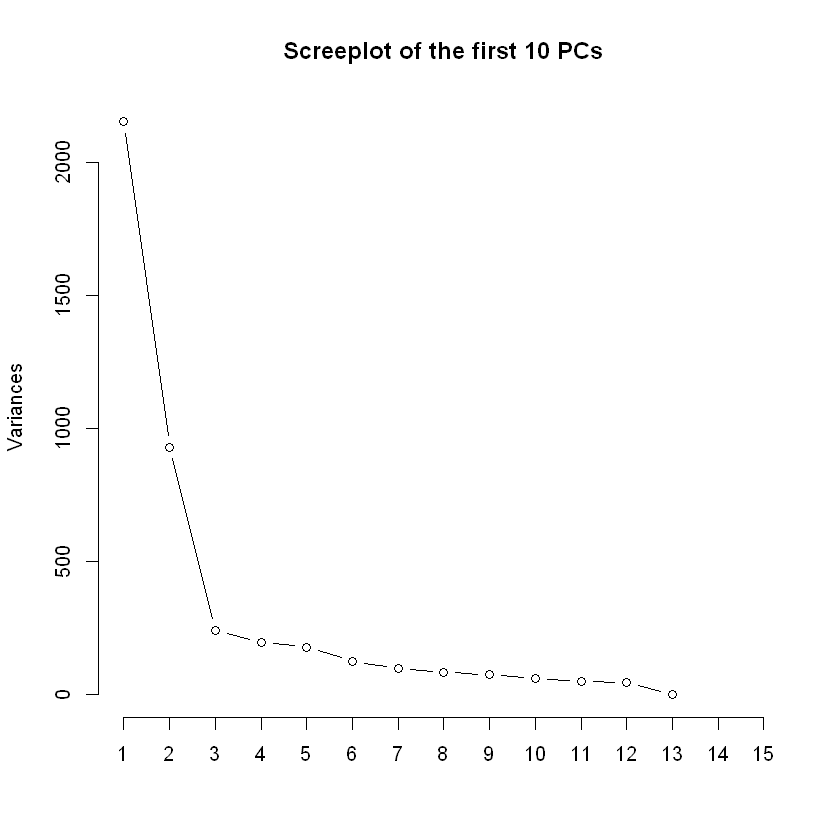

In [17]:
screeplot(DEG.pr, type = "l", npcs = 15, main = "Screeplot of the first 10 PCs")

Plotting PC1 & PC2, which together explain most of the variance

In [18]:
DEG.pr$x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Gaba1,-9.893081,-32.381846,5.669450,-0.68811525,5.370906,-14.5127950,2.906626,-2.1484610,7.5023152,-14.390947,-12.181793,5.4262845,-3.240225e-14
Gaba2,43.838487,19.925882,6.326197,-15.02259442,-17.964055,-1.8002989,1.642350,5.3858701,0.6945750,4.211516,-10.640337,-13.0025363,-4.861487e-14
Gaba3,-20.227413,-39.684251,-9.894177,-3.20537642,4.676406,8.7345421,6.762195,-2.1537514,19.8802066,10.429388,3.239179,-2.7449654,-8.815431e-15
Gaba4,46.005494,8.917769,-8.532325,-1.37367720,14.181175,7.6795455,-6.820432,23.6209812,2.2559262,-5.826107,3.325164,2.5039911,-5.591868e-14
Gaba5,-40.759745,-34.892590,-20.258759,14.11905047,-19.938192,3.2066368,1.986000,7.2958655,-12.2326101,4.766020,-4.428874,4.8358959,1.117975e-13
Gaba6,42.635104,9.232901,-1.350097,8.02496710,18.182703,17.3708760,15.935457,-10.0918511,-9.5808484,-1.941091,-4.376192,-1.4465618,-5.130325e-14
Gaba7,46.277962,24.934573,7.684309,-15.81437720,-11.148247,-1.8930286,3.863614,-4.2871035,1.2725672,6.651801,2.781869,16.5443312,-6.843311e-14
Glu1,-109.909777,59.287699,-11.742401,-11.71645721,7.551664,-1.1886003,1.677547,-0.3702378,-0.2687635,-1.433582,-0.762415,-0.4395221,1.180423e-13
Gaba8,-5.902116,-9.976502,6.567738,-2.34560831,-17.100087,-0.3446184,9.815740,-1.3808286,-1.5612705,-13.419012,15.017766,-5.1178133,-1.608444e-14
Gaba9,49.378113,-1.918432,-28.496663,-0.02413434,8.004161,-19.2728705,-9.545561,-10.1453894,-4.0657670,2.209578,4.713907,-3.9257779,-2.656187e-14


In [19]:
pca.plt<-data.frame(DEG.pr$x[,1],DEG.pr$x[,2])
colnames(pca.plt)<-c('PC1','PC2')

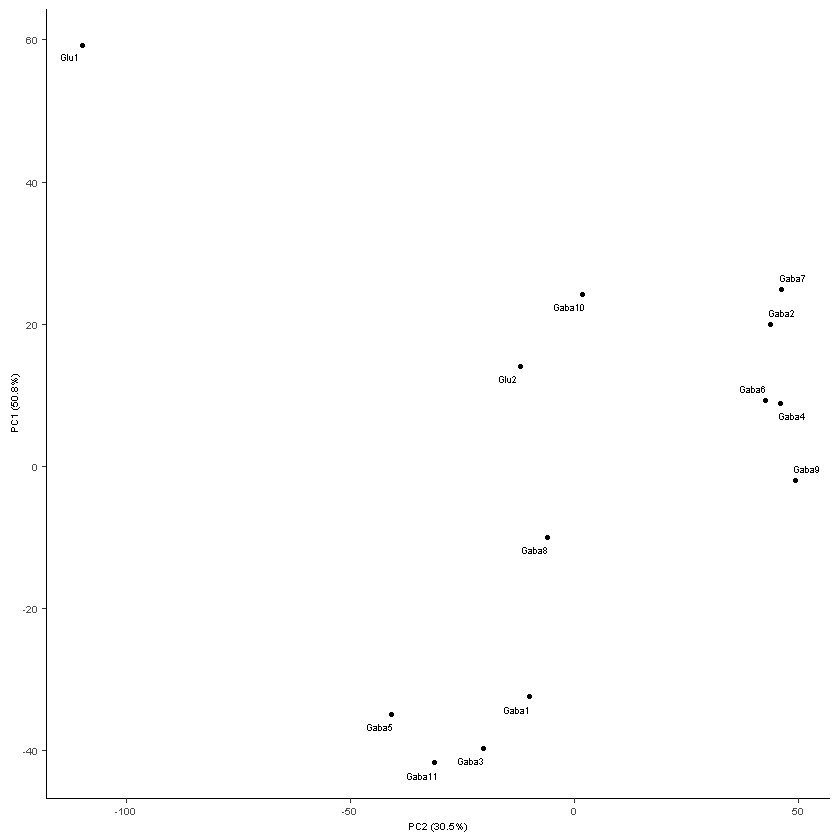

In [20]:
library(ggrepel)
ggplot(pca.plt, aes(x=PC1, y=PC2, label=rownames(pca.plt)))+
    geom_point(size=1) +
    geom_text_repel(size=2)+
    theme_classic() +
    theme(axis.line = element_line(size=0.25),
        axis.ticks = element_line(size=0.25),
        axis.text = element_text(size=6),
        axis.title = element_text(size=6),
        plot.title = element_text(size=6))+
ylab('PC1 (50.8%)') +
xlab('PC2 (30.5%)')

Identify PC loadings for feature selection

In [21]:
loadings<-data.frame(DEG.pr$rotation)

In [22]:
loadings<-loadings[order(-loadings$PC1),] #order by PC1

In [23]:
top_100 <- rownames(loadings)[1:100] #take top 100 features

Generate heatmap of the top 100 DEGs

In [24]:
DEG.df.t<-data.frame(t(DEG.df))
colnames(DEG.df.t) <- DEG.df.t[1,]
DEG.df.t<-DEG.df.t[2:14,]

DEG.df.t<-apply(DEG.df.t, MARGIN=2,as.numeric)
rownames(DEG.df.t) <- Cell_type

DEG.df.t<-DEG.df.t[1:13,]

DEG.df.t[is.na(DEG.df.t)] <- 0
DEG.df.t[is.infinite(DEG.df.t)] <- 0

DEG.heatmap<-data.frame(t(DEG.df.t))

In [25]:
DEG.heatmap

,Gaba1,Gaba2,Gaba3,Gaba4,Gaba5,Gaba6,Gaba7,Glu1,Gaba8,Gaba9,Gaba10,Glu2,Gaba11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gm13572,0.000000,1.7888060,2.78322200,1.5852660,1.2978080,3.36276600,3.3439690,1.9328990,0.0000000,0.0000000,0.0000000,1.8669490,0.9289019
Gm26732,4.526114,1.1721920,0.07986088,0.0000000,1.7419440,0.73574790,0.6542519,0.3528297,2.4865460,1.0193360,1.1619970,1.9023480,0.0000000
A930019D19Rik,3.980189,1.8165640,0.52479330,1.9635870,1.6271350,1.65492600,1.4601790,3.6057970,1.1209550,1.7139930,2.2068910,1.4262790,2.7126240
D730045A05Rik,3.057627,2.7256730,2.09495300,1.9838860,4.5159240,2.00313400,2.5262329,3.5596850,1.9218700,1.7963100,0.0000000,0.0000000,0.0000000
Olfr689,3.406641,2.2685320,1.00333100,2.2404740,2.7011090,2.48865900,0.8920633,0.0000000,3.3387120,0.0000000,1.9203890,1.1803120,2.3637570
4933407I08Rik,3.754360,3.0140200,1.19902200,2.7222510,0.0000000,1.85188000,1.8100494,-0.4591604,3.0295450,0.6966709,1.8874080,1.5848000,0.6215810
Retsat,2.258362,2.2924540,2.06588800,1.2528770,1.1622260,1.01343000,1.3448160,2.6434600,1.9016810,1.1085110,2.3357480,1.4131440,1.9209450
Gm13833,1.872280,3.3319300,2.72212400,2.4278370,2.6224350,4.08712400,2.2677515,4.2749090,3.3180350,2.1979070,0.8234698,0.5660844,1.6340010
Gm15354,4.068726,1.0731680,4.12162100,2.6780870,4.0543170,2.26423000,1.8850100,1.5827270,3.3323590,2.7827280,1.5340390,0.4587780,2.7386620


In [26]:
DEG.heatmap$genes <- DEG.df$genes

DEG.heatmap<- DEG.heatmap[rownames(DEG.heatmap) %in% top_100,]

library(reshape2)
DEG.plt <- apply(DEG.heatmap[1:13], MARGIN=1, scale)
DEG.plt <- melt(DEG.plt, id='genes')

In [27]:
DEG.plt

Var1,Var2,value
<int>,<fct>,<dbl>
1,4933407I08Rik,1.66492708
2,4933407I08Rik,1.07351172
3,4933407I08Rik,-0.37638657
4,4933407I08Rik,0.84043412
5,4933407I08Rik,-1.33421680
6,4933407I08Rik,0.14514442
7,4933407I08Rik,0.11172832
8,4933407I08Rik,-1.70101383
9,4933407I08Rik,1.08591376


Visualize

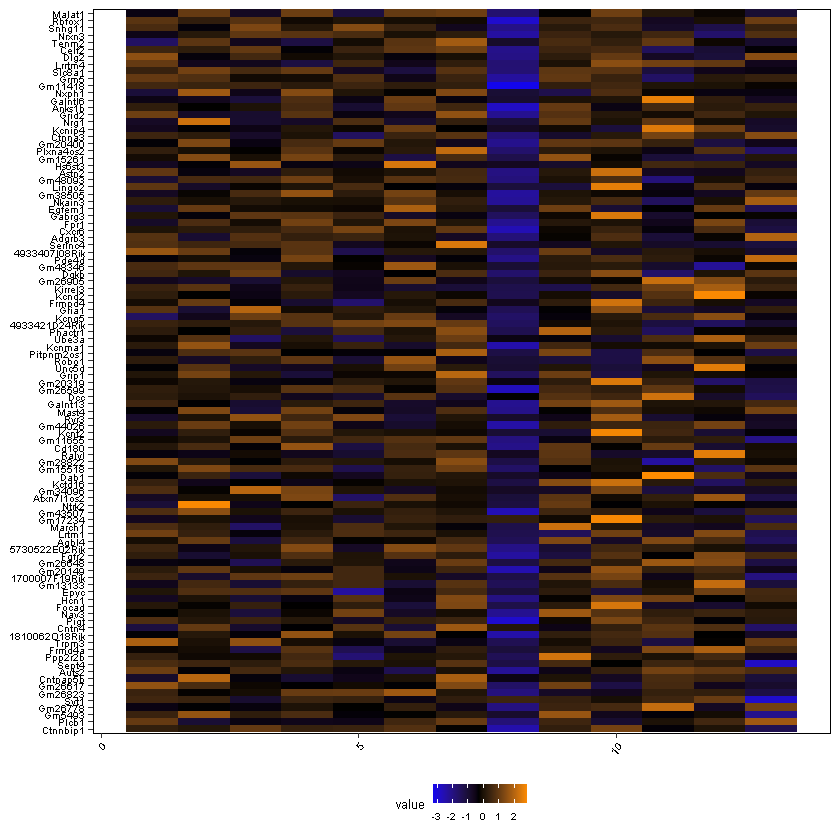

In [28]:
DEG.plt$Var2 <- factor(DEG.plt$Var2, levels=rev(top_100))

library(scales)
low <- -0.1
high <- 0.1
ggplot(DEG.plt, aes(Var1,Var2)) + 
geom_tile(aes(fill =value))+ 
scale_fill_gradient2(low = "blue",mid='black',high = "darkorange",midpoint=-0.3,oob=squish)+
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(color = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')

#### Producing a dendrogram to organize the heatmap

Running it on the cell clusters (still omitting Gaba12)

In [29]:
library(ggdendro)

Cell_number_s<-scale(DEG.heatmap[1:13])
Cell_number_s <- Cell_number_s[!is.nan(Cell_number_s[1]),]

mt<-as.matrix(t(Cell_number_s))
mt

Warning message:
"package 'ggdendro' was built under R version 4.1.3"


,4933407I08Rik,Cxcr6,Plxna4os2,Gm28822,Gm26823,Gm26648,Gm48346,Gm20400,Gm15518,Cd180,...,Egfem1,Gm11418,Gm17234,Gm26778,Frmpd4,1700007F19Rik,Robo1,Sept4,Pigt,Ctnnbip1
Gaba1,0.0923739565,0.06892464,0.064633831,0.083129508,0.033792116,0.04428176,0.047001381,0.07214974,0.035530429,0.0248991044,...,0.001800429,-0.04287079,0.02721296,0.020395083,0.07366920,0.030004177,0.100645106,-0.04143877,-0.03435651,-0.03550439
Gaba2,0.0679074382,0.07336297,0.041160641,0.025798389,0.007666209,0.03825124,0.055031987,0.17219771,0.057797070,0.0243153309,...,0.115606972,-0.07704478,0.03757877,0.011567831,0.11578294,-0.039184729,0.020492057,-0.07184396,-0.06907298,-0.06378179
Gaba3,0.0220737336,0.08066541,0.043983733,0.022174338,0.028315197,0.01779920,0.062926664,0.06988464,0.051137470,0.0205572570,...,0.051450418,-0.04135682,0.03333953,0.026260716,0.06981184,0.051523246,0.106193939,-0.04408411,-0.03218602,-0.02019089
Gaba4,0.0577570720,0.09062929,0.089467286,0.028440631,0.037841220,0.06090388,0.010773874,0.13053765,0.039637832,0.0465910307,...,0.038472935,-0.09673425,0.03685769,0.020735194,0.04084299,0.048098395,0.165444135,-0.06956864,-0.07081072,-0.06130252
Gaba5,-0.0007053627,0.11815228,0.055250281,0.048025803,0.059203055,0.07138831,0.024634714,0.14768825,0.022855079,0.0163150024,...,0.056795424,-0.02836664,0.03228731,0.038892938,0.03689722,0.046211690,0.029616967,-0.03257639,-0.03475634,-0.01581072
Gaba6,0.0261587418,0.06391943,0.053906369,0.013025298,0.053779291,0.03039732,0.096990061,0.09686827,0.032987711,0.0230881921,...,0.173765093,-0.09058924,0.05485372,0.030867618,0.07261408,-0.003439211,0.226564886,-0.08662172,-0.06665145,-0.05371386
Gaba7,0.0171866812,0.09620969,0.147436996,0.080040262,0.006936816,0.08661670,-0.004193500,0.04535781,0.043875338,0.0008869363,...,0.052219752,-0.09526852,0.04273340,-0.003272698,0.09256696,-0.044084192,0.028771662,-0.07140977,-0.07146439,-0.07909330
Glu1,0.0795001423,0.09114652,0.087850385,0.091146518,0.096182036,0.12436166,0.086377608,0.09114652,0.107347485,0.0919364006,...,0.105065203,-0.12708330,0.15665958,0.091146518,0.15652865,0.078875316,0.119633087,0.03602400,0.03290353,0.04070611
Gaba8,0.0674944721,0.05789739,0.056582622,0.056895370,0.006003738,0.07393987,0.021728113,0.13579199,0.023746895,0.0357438673,...,0.113069738,-0.06295791,0.03758180,0.039192873,0.08240782,0.038663358,0.003688624,-0.04844500,-0.05309718,-0.04159947
Gaba9,-0.0355792476,0.06166539,0.025510173,-0.002513793,-0.022252126,0.04141481,-0.004432665,0.12792541,0.004462464,-0.0172909438,...,-0.035052844,-0.09137842,0.12700425,0.019316484,0.14700900,0.032677827,-0.041428880,-0.11466824,-0.07095112,-0.06694843


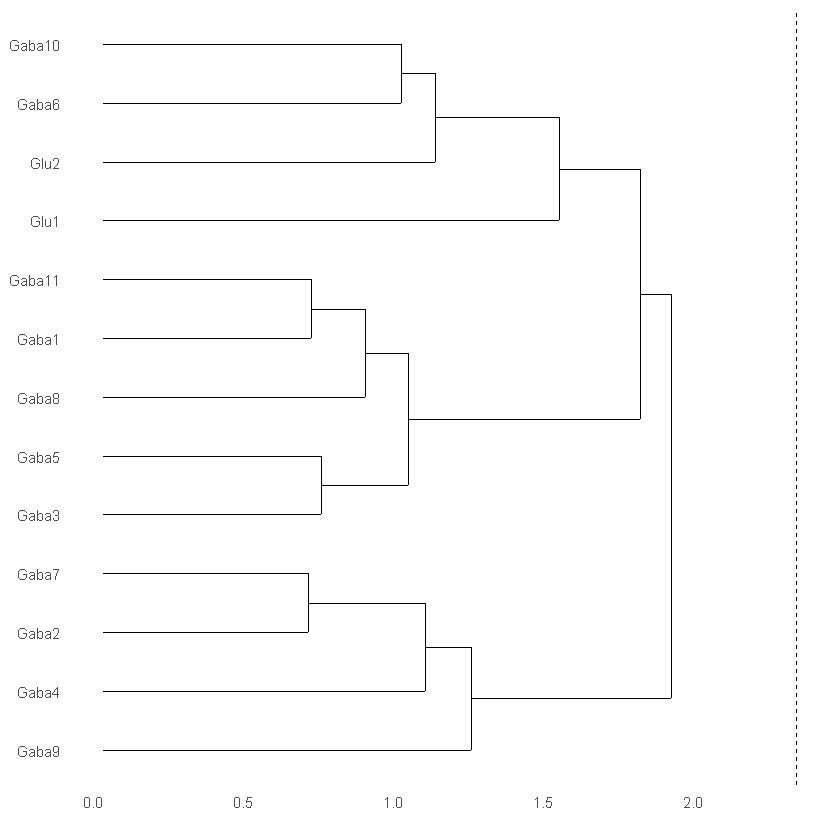

In [31]:
mt<-as.matrix(t(Cell_number_s))
mt.dendro <- as.dendrogram(hclust(d = dist(x = mt)))
dendro.plot <- ggdendrogram(data = mt.dendro, rotate = TRUE, size=0.25, label=TRUE)+ geom_hline(yintercept=2.31, linetype="dashed", color = "black", size=0.2) 
dendro.plot

In [32]:
mt2<-as.matrix((Cell_number_s))
mt2.dendro <- as.dendrogram(hclust(d = dist(x = mt2)))
dendro.plot2 <- ggdendrogram(data = mt2.dendro, rotate = FALSE, size=0.25) + 
  theme(axis.text.x = element_blank(),axis.text.y = element_blank(),plot.margin = margin(20, 0, 0, 0))

In [33]:
str(mt.dendro)

--[dendrogram w/ 2 branches and 13 members at h = 1.89]
  |--[dendrogram w/ 2 branches and 4 members at h = 1.23]
  |  |--leaf "Gaba9" 
  |  `--[dendrogram w/ 2 branches and 3 members at h = 1.07]
  |     |--leaf "Gaba4" 
  |     `--[dendrogram w/ 2 branches and 2 members at h = 0.685]
  |        |--leaf "Gaba2" 
  |        `--leaf "Gaba7" 
  `--[dendrogram w/ 2 branches and 9 members at h = 1.79]
     |--[dendrogram w/ 2 branches and 5 members at h = 1.02]
     |  |--[dendrogram w/ 2 branches and 2 members at h = 0.728]
     |  |  |--leaf "Gaba3" 
     |  |  `--leaf "Gaba5" 
     |  `--[dendrogram w/ 2 branches and 3 members at h = 0.874]
     |     |--leaf "Gaba8" 
     |     `--[dendrogram w/ 2 branches and 2 members at h = 0.695]
     |        |--leaf "Gaba1" 
     |        `--leaf "Gaba11" 
     `--[dendrogram w/ 2 branches and 4 members at h = 1.52]
        |--leaf "Glu1" 
        `--[dendrogram w/ 2 branches and 3 members at h = 1.11]
           |--leaf "Glu2" 
           `--[de

In [34]:
mt.long.cells<-melt(mt)

mt.order.cells <- order.dendrogram(mt.dendro)

mt.long.cells$Var1 <- factor(x = mt.long.cells$Var1,
                               levels = rownames(mt)[mt.order.cells], 
                               ordered = TRUE)

Running the dendrogram on the genes

In [35]:
Cell_number_s<-scale(t(DEG.heatmap[1:13]))
Cell_number_s <- Cell_number_s[!is.nan(Cell_number_s[1]),]
mt<-as.matrix(t(Cell_number_s))

colnames(mt) <- factor(colnames(mt), levels=c("Glu2","Glu1","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

mt<-as.matrix(t(Cell_number_s))
mt.dendro <- as.dendrogram(hclust(d = dist(x = mt)))
dendro.plot <- ggdendrogram(data = mt.dendro, rotate = TRUE, size=0.25)+ geom_hline(yintercept=2.31, linetype="dashed", color = "black", size=0.2) + 
  theme(axis.text.x = element_blank(),axis.text.y = element_blank(), plot.margin = margin(0, 0, 0, 0))

mt2<-as.matrix((Cell_number_s))
mt2.dendro <- as.dendrogram(hclust(d = dist(x = mt2)))
dendro.plot2 <- ggdendrogram(data = mt2.dendro, rotate = FALSE, size=0.25) + 
  theme(axis.text.x = element_blank(),axis.text.y = element_blank(),plot.margin = margin(20, 0, 0, 0))

In [36]:
mt.long<-melt(mt)

mt.order <- order.dendrogram(mt.dendro)

mt.long$Var1 <- factor(x = mt.long$Var1,
                               levels = rownames(mt)[mt.order], 
                               ordered = TRUE)

#### Sorting the heatmap according to the dendrogram

In [37]:
newlabs <- Cell_type
colnames(mt.long)[3] <- 'zscore'
mt.long
mt.long$Var2 <- factor(mt.long$Var2, levels= unique(mt.long.cells$Var1))

Var1,Var2,zscore
<ord>,<fct>,<dbl>
4933407I08Rik,Gaba1,1.66492708
Cxcr6,Gaba1,0.01492505
Plxna4os2,Gaba1,0.30313186
Gm28822,Gaba1,1.36462608
Gm26823,Gaba1,0.41502556
Gm26648,Gaba1,-0.44420759
Gm48346,Gaba1,0.62534662
Gm20400,Gaba1,-0.34841774
Gm15518,Gaba1,0.04877033


In [ ]:
saveRDS(mt.long, "deg_dataframe_top100.rds")

In [38]:
mt.long$Var2 <- factor(mt.long$Var2, levels=levels(mt.long.cells$Var1))
mt.long$Var2 <- factor(mt.long$Var2, levels=c('Gaba10','Gaba6','Gaba4','Glu2','Gaba8','Gaba7','Gaba2','Gaba9','Gaba11','Gaba3','Gaba1','Gaba5','Glu1'))

In [39]:
high_C<-"orange"
middle_C<-"black"
low_C<-"blue"
low<- -3
high<-3
#pdf("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Group_condition/heatmap_dendrogram_7.pdf", 7, 5)
heatmap.plot <- ggplot(data = mt.long, aes(x = Var2, y = Var1)) +
    geom_tile(aes(fill = zscore)) + 
    scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0,oob=squish)+
    theme_classic()+
    theme(axis.line = element_blank(),
          axis.text.x=element_text(size=6,colour = "black", vjust =0,hjust=0,angle=45),
          axis.ticks.y = element_blank(),
          axis.ticks.x = element_line(size=0.25),
          axis.text.y = element_blank(),
          axis.title.x = element_blank(),  
          axis.title.y = element_text(size=6),
          legend.position = "bottom",
          legend.text = element_text(size=6),
          legend.title = element_text(size=6),
          plot.margin = margin(0, 0, 0, 0))+
ylab('Differentially regulated genes (DEGs)')

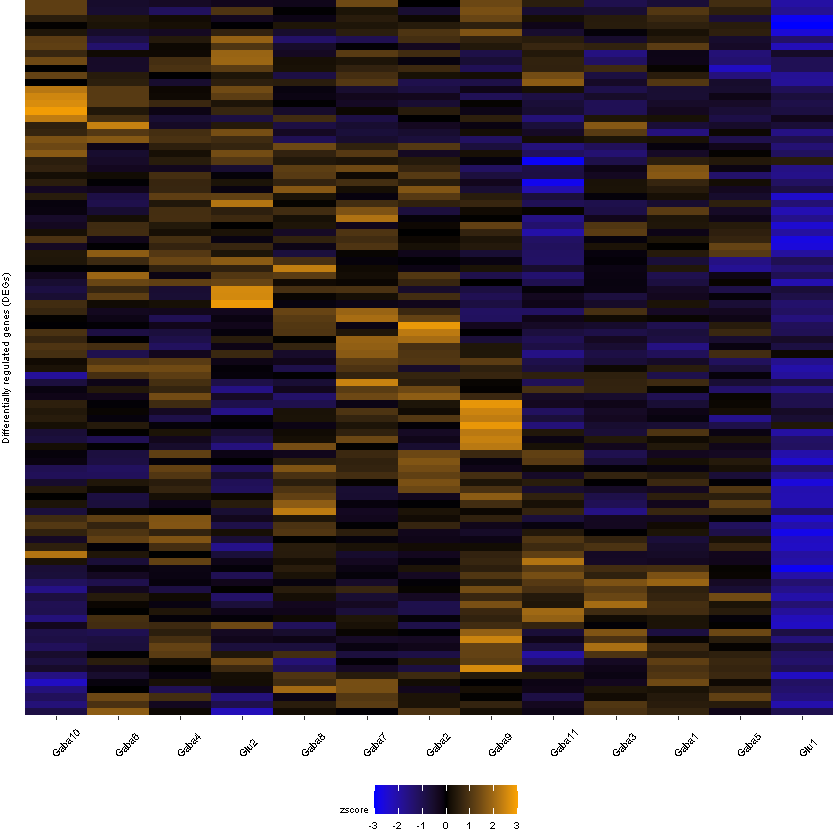

In [40]:
heatmap.plot

#### Plotting GO terms enriched in the top 100 features

In [42]:
MF_mor <- read.table(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter2/DEG/Independent/sal_over_mor/pca_v2/GO_Molecular_Function_2021_table_Top100.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")

In [43]:
new.numb <- unlist(apply(MF_mor[2], 1, function(y) sub("/.*","",y)))
MF_mor$Overlap <- new.numb
MF_mor

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
voltage-gated potassium channel activity (GO:0005249),5,5.683113e-05,0.004915708,0,0,13.549556,132.45268,KCNT2;KCND2;KCNMA1;KCNQ5;HCN1
potassium channel activity (GO:0005267),5,9.348501e-05,0.004915708,0,0,12.126071,112.50216,KCNT2;KCND2;KCNMA1;KCNQ5;HCN1
glutamate receptor activity (GO:0008066),3,1.108806e-04,0.004915708,0,0,38.435567,350.03487,GRIA1;GRID2;GRM5
outward rectifier potassium channel activity (GO:0015271),2,1.321840e-03,0.035046500,0,0,45.104308,298.98431,KCND2;KCNT2
voltage-gated cation channel activity (GO:0022843),4,1.428171e-03,0.035046500,0,0,8.874104,58.13745,KCND2;KCNMA1;KCNQ5;HCN1
cAMP binding (GO:0030552),2,1.581045e-03,0.035046500,0,0,40.591837,261.80392,PDE4D;HCN1
voltage-gated ion channel activity (GO:0005244),2,2.837415e-03,0.053910885,0,0,28.988338,170.01260,KCND2;HCN1
protein tyrosine kinase activator activity (GO:0030296),2,4.004046e-03,0.064975651,0,0,23.869148,131.76844,GRM5;NRG1
postsynaptic neurotransmitter receptor activity (GO:0098960),2,4.885387e-03,0.064975651,0,0,21.354458,113.63789,GRIA1;GRM5


In [44]:
terms <- rev(c("voltage-gated potassium channel activity (GO:0005249)",
           "potassium channel activity (GO:0005267)",
           "glutamate receptor activity (GO:0008066)",
           "outward rectifier potassium channel activity (GO:0015271)",
           "voltage-gated cation channel activity (GO:0022843)",
           "cAMP binding (GO:0030552)",
            "voltage-gated ion channel activity (GO:0005244)",
              "protein tyrosine kinase activator activity (GO:0030296)",
              "postsynaptic neurotransmitter receptor activity (GO:0098960)",
              "neurotransmitter receptor activity involved in regulation of postsynaptic membrane potential (GO:0099529)"))

In [45]:
MF_mor <- MF_mor[MF_mor$Term %in% terms,]

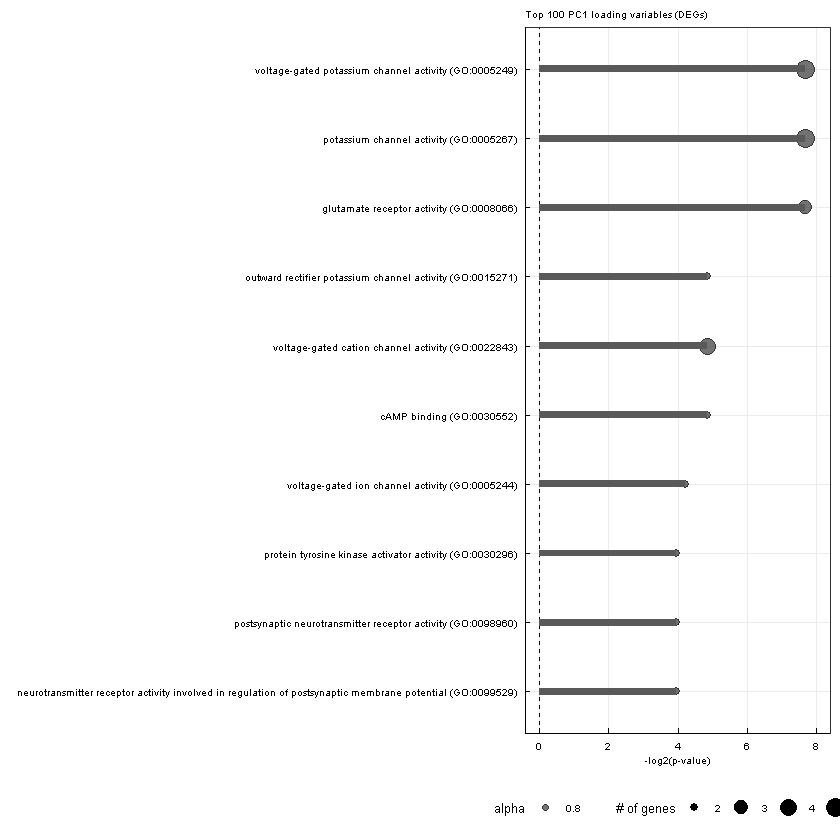

In [48]:
mor_100 <- ggplot(MF_mor, aes(x = Term, y= as.numeric(-log2(Adjusted.P.value))))+
geom_hline(yintercept = 0, linetype="dashed", color = "black", size=.25)+
geom_point (data=MF_mor,aes(x=Term, y=as.numeric(-log2(Adjusted.P.value)), size = as.numeric(Overlap), alpha=0.8))+
geom_bar(stat='identity',width=0.1)+
scale_size(range = c(2,5))+
scale_x_discrete(limits= terms)+
scale_y_continuous(limits=c(0,8))+
scale_color_gradient(low="green", high="red",limits=c(0, NA))+
coord_flip()+
theme_bw()+
theme(plot.title = element_text(size=6),
    axis.title.y = element_blank(),
    axis.title.x = element_text(size=6),
    axis.line=element_line(size=0.25),
    axis.ticks=element_line(size=0.25),
    axis.ticks.length=unit(-0.1, "cm"),
    axis.text.x = element_text(margin=margin(5,5,0,5,"pt"), size=6),
    axis.text.y = element_text(margin=margin(5,5,5,5,"pt"), size=6),
    axis.text = element_text(color = "black", size=6),
    panel.grid.minor = element_blank(),
    legend.position='bottomleft')+
    theme(legend.title = element_text(size = 8),
    legend.text = element_text(size = 6), 
    axis.ticks = element_line(colour = "black", size = .25),
     legend.position='bottom')+
ylab("-log2(p-value)")+
ggtitle('Top 100 PC1 loading variables (DEGs)') +
labs(size="# of genes") 
mor_100